d:\006-ENG\graduation-project\HOG\recognition


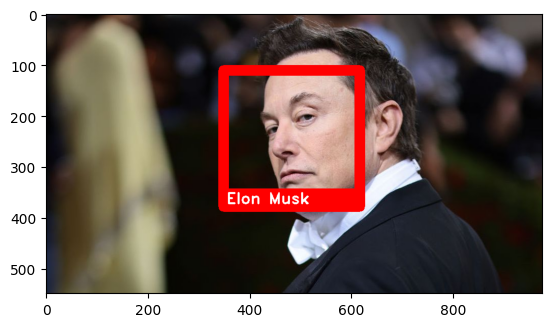

In [6]:
import os
import cv2
import face_recognition
import matplotlib.pyplot as plt
import numpy as np
print(os.getcwd())
known_image = '..\\..\\test_images\\rec_known_images\\Elon-Musk.jpg'
unknown_image_dir = '..\\..\\test_images\\rec_test_images\\elon_mask_3.jpg'

fig, axs = plt.subplots()

# known Image
elon = face_recognition.load_image_file(known_image)
elon_encoding = face_recognition.face_encodings(elon)[0]

# known Image
img = face_recognition.load_image_file(unknown_image_dir)
face_locations = face_recognition.face_locations(img)
face_encodings = face_recognition.face_encodings(img, face_locations)


for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    name = 'Unknown'
    color = (0, 0, 0)
    
    matches = face_recognition.compare_faces([elon_encoding], face_encoding)
    
    # Use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance([elon_encoding], face_encoding)
    best_match_index = np.argmin(face_distances)
    
    if matches[best_match_index]:
        name = 'Elon Musk'
        color = (255, 0, 0)
        
    # Rectangle  
    img = cv2.rectangle(img, (right, top), (left, bottom), color, 20)
    
    # Label
    cv2.rectangle(img, (left, bottom - 35), (right, bottom), color, cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(img, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 2)

axs.imshow(img)

plt.show()


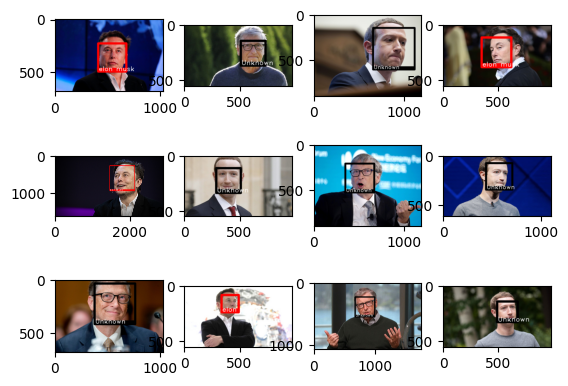

In [9]:
import cv2
import face_recognition
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import ravel
from math import ceil 

known_image = '..\\..\\test_images\\rec_known_images\\Elon-Musk.jpg'

unknown_image_dir = '..\\..\\test_images\\rec_test_images'
img_list = os.listdir(unknown_image_dir)

# known Image
elon = face_recognition.load_image_file(known_image)
elon_encoding = face_recognition.face_encodings(elon)[0]


fig, axs = plt.subplots(ncols=(ceil(len(img_list)/3)), nrows=3)
flat_axs = ravel(axs)

i = 0
for img in img_list:
    img = os.path.join(unknown_image_dir, img)
    
    # known Image
    img = face_recognition.load_image_file(img)
    face_locations = face_recognition.face_locations(img)
    face_encodings = face_recognition.face_encodings(img, face_locations)


    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        name = 'Unknown'
        color = (0, 0, 0)
        
        matches = face_recognition.compare_faces([elon_encoding], face_encoding)
        
        # Use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance([elon_encoding], face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = 'elon musk'
            color = (255, 0, 0)
        img = cv2.rectangle(img, (right, top), (left, bottom), color, 20)
        # face_image = img[top:bottom, left:right]  # crop
        
        # Label
        cv2.rectangle(img, (left, bottom - 35), (right, bottom), color, cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(img, name, (left + 6, bottom - 6), font, 2.0, (255, 255, 255), 2)
            
    flat_axs[i].imshow(img)
    i += 1

plt.show()


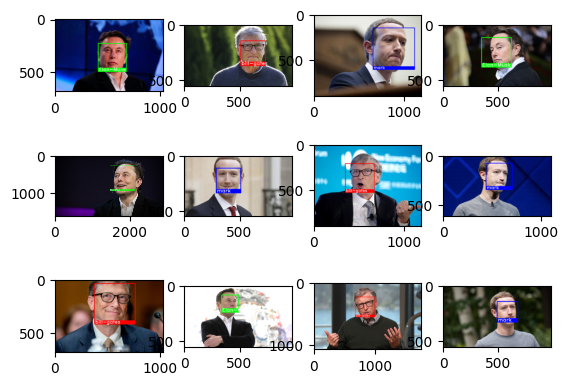

In [10]:
import cv2
import face_recognition
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import ravel
from math import ceil

known_image_dir = '..\\..\\test_images\\rec_known_images'
known_img_list = os.listdir(known_image_dir)

unknown_image_dir = '..\\..\\test_images\\rec_test_images'
img_list = os.listdir(unknown_image_dir)

known_img_encoding = []
known_img_names = []
color_list = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]

# known Image
for img in known_img_list:
    img_path = os.path.join(known_image_dir, img)
    
    x = face_recognition.load_image_file(img_path)
    x_encoding = face_recognition.face_encodings(x)[0]
    
    known_img_encoding.append(x_encoding)
    known_img_names.append(img[:-4])

fig, axs = plt.subplots(ncols=(ceil(len(img_list)/3)), nrows=3)
flat_axs = ravel(axs)

i = 0
for img in img_list:
    name = 'Unknown'
    color = (0, 0, 0)
    img = os.path.join(unknown_image_dir, img)
    
    # known Image
    img = face_recognition.load_image_file(img)
    face_locations = face_recognition.face_locations(img)
    face_encodings = face_recognition.face_encodings(img, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        
        matches = face_recognition.compare_faces(known_img_encoding, face_encoding)
        
        # Use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(known_img_encoding, face_encoding)
        best_match_index = np.argmin(face_distances)
        
        if matches[best_match_index]:
            name = known_img_names[best_match_index]
            color = color_list[best_match_index]
            
        img = cv2.rectangle(img, (right, top), (left, bottom), color, 5)
        # face_image = img[top:bottom, left:right]  # crop
        
        # Label
        cv2.rectangle(img, (left, bottom - 35), (right, bottom), color, cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(img, name, (left + 6, bottom - 6), font, 1.5, (255, 255, 255), 2)

    flat_axs[i].imshow(img)
    i += 1

plt.show()


In [1]:
import cv2
import face_recognition
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import ravel
from math import ceil

known_image_dir = '..\\..\\test_images\\rec_our_images'
known_img_list = os.listdir(known_image_dir)

known_img_encoding = []
known_img_names = []
color_list = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 0, 0), (0, 255, 0), (0, 0, 255)]

# known Image
for img in known_img_list:
    img_path = os.path.join(known_image_dir, img)
    
    x = face_recognition.load_image_file(img_path)
    x_encoding = face_recognition.face_encodings(x)[0]
    
    known_img_encoding.append(x_encoding)
    known_img_names.append(img[:-4])

video_capture  = cv2.VideoCapture(0)
while True:
    name = 'Unknown'
    color = (0, 0, 0)

    ret, frame = video_capture.read() 
    # frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      
    # known Image
    face_locations = face_recognition.face_locations(frame)
    face_encodings = face_recognition.face_encodings(frame, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        
        matches = face_recognition.compare_faces(known_img_encoding, face_encoding)
        
        # Use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(known_img_encoding, face_encoding)
        best_match_index = np.argmin(face_distances)
        
        if matches[best_match_index]:
            name = known_img_names[best_match_index]
            color = color_list[best_match_index]
            
        frame = cv2.rectangle(frame, (right, top), (left, bottom), color, 3)
        # face_image = img[top:bottom, left:right]  # crop
        
        # Label
        cv2.rectangle(frame, (left, bottom - 25), (right, bottom), color, cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1, (255, 255, 255), 2)
    
    cv2.imshow('frame', cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()